## **Prediksi Kelangsungan hidup pasien sirosis**


### **Data Understanding**

#### **Sumber Data**

Berikut ini link dataset:https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1

In [5]:
pip install ucimlrepo

In [10]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

# data (as pandas dataframes)
X = cirrhosis_patient_survival_prediction.data.features
y = cirrhosis_patient_survival_prediction.data.targets

# metadata
print(cirrhosis_patient_survival_prediction.metadata)

# variable information
print(cirrhosis_patient_survival_prediction.variables)


{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'ID': 296, 'type'

### **Preprocessing Data**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Drug           313 non-null    object 
 1   Age            418 non-null    int64  
 2   Sex            418 non-null    object 
 3   Ascites        313 non-null    object 
 4   Hepatomegaly   313 non-null    object 
 5   Spiders        313 non-null    object 
 6   Edema          418 non-null    object 
 7   Bilirubin      418 non-null    float64
 8   Cholesterol    312 non-null    object 
 9   Albumin        418 non-null    float64
 10  Copper         312 non-null    object 
 11  Alk_Phos       312 non-null    float64
 12  SGOT           312 non-null    float64
 13  Tryglicerides  312 non-null    object 
 14  Platelets      411 non-null    object 
 15  Prothrombin    416 non-null    float64
 16  Stage          412 non-null    float64
 17  Status         418 non-null    object 
dtypes: float64

/tmp/ipython-input-11-3222893454.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
/tmp/ipython-input-11-3222893454.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
/tmp/ipython-input-11-3222893454.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

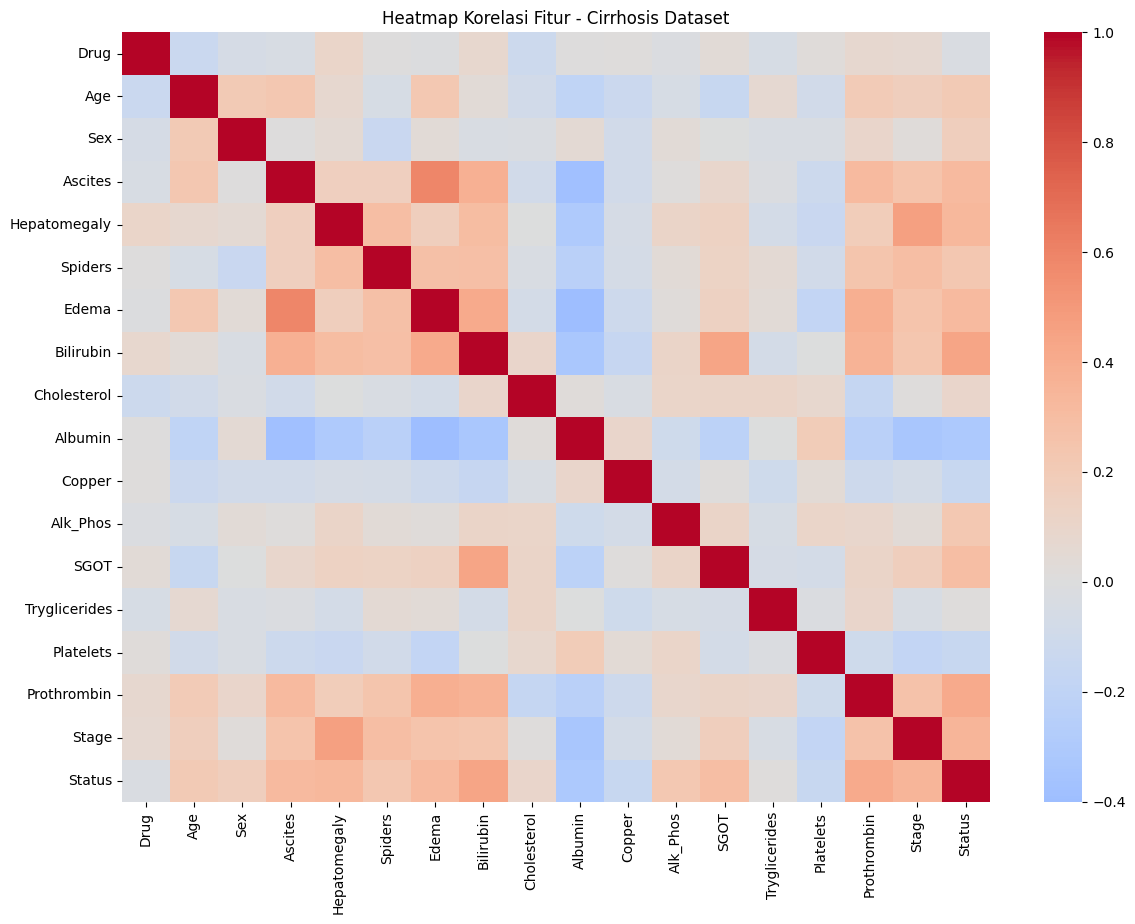

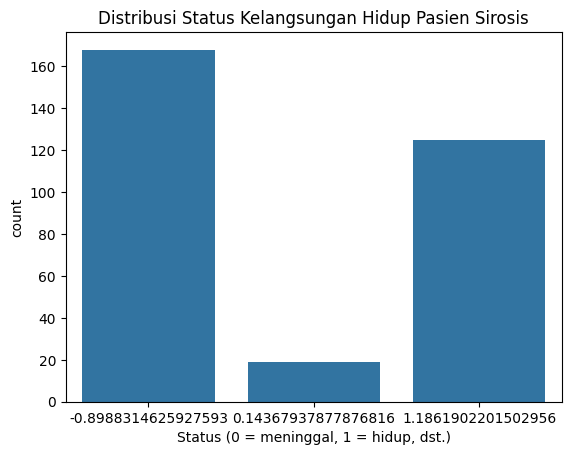

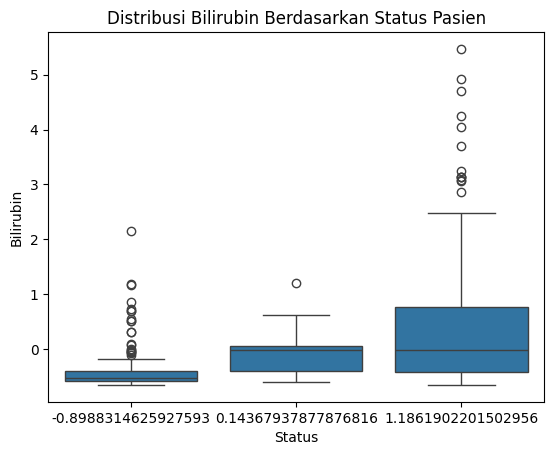

In [11]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil data
data = fetch_ucirepo(id=878)
X = data.data.features.copy()
y = data.data.targets.copy()

# Gabungkan data dan target
df = pd.concat([X, y], axis=1)

# Lihat informasi awal
print(df.info())
print(df.isnull().sum())  # Cek missing values

# Drop baris dengan missing values (atau bisa gunakan imputasi jika ingin lebih kompleks)
df_clean = df.dropna()

# Cek ulang
print("Setelah menghapus missing value:", df_clean.shape)

# Label encoding kolom kategorikal
le = LabelEncoder()
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = le.fit_transform(df_clean[col])

# Normalisasi fitur numerik
scaler = StandardScaler()
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

plt.figure(figsize=(14, 10))
sns.heatmap(df_clean.corr(), cmap='coolwarm', center=0)
plt.title("Heatmap Korelasi Fitur - Cirrhosis Dataset")
plt.show()

sns.countplot(data=df_clean, x='Status')
plt.title("Distribusi Status Kelangsungan Hidup Pasien Sirosis")
plt.xlabel("Status (0 = meninggal, 1 = hidup, dst.)")
plt.show()

sns.boxplot(data=df_clean, x="Status", y="Bilirubin")
plt.title("Distribusi Bilirubin Berdasarkan Status Pasien")
plt.show()


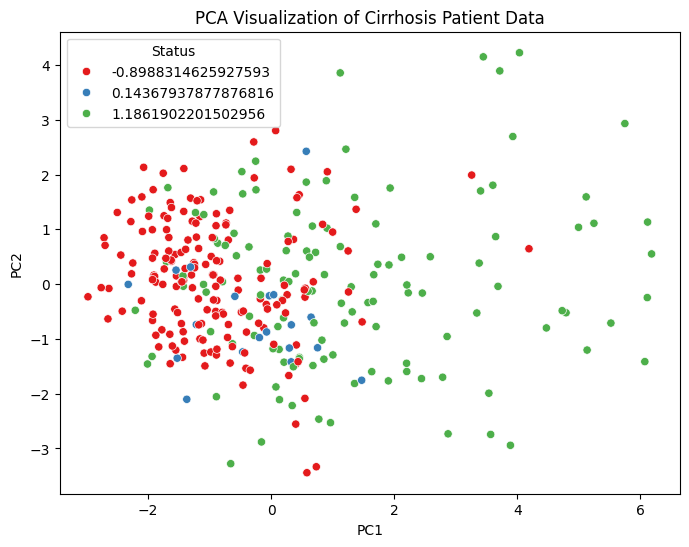

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_clean.drop(columns=['Status']))

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_clean['Status'], palette='Set1')
plt.title("PCA Visualization of Cirrhosis Patient Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
